In [1]:
#Minh Nguyen - cgv646
#Project 3 Data Science

#All Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn
import zipfile
import os

In [2]:
zipfile.ZipFile('names.zip').extractall('.')
os.listdir('names')

['yob2000.txt',
 'yob2014.txt',
 'yob1938.txt',
 'yob1910.txt',
 'yob1904.txt',
 'yob1905.txt',
 'yob1911.txt',
 'yob1939.txt',
 'yob2001.txt',
 'yob2003.txt',
 'yob1907.txt',
 'yob1913.txt',
 'yob1898.txt',
 'yob1899.txt',
 'yob1912.txt',
 'yob1906.txt',
 'yob2002.txt',
 'yob2012.txt',
 'yob2006.txt',
 'yob1902.txt',
 'yob1916.txt',
 'yob1889.txt',
 'yob1888.txt',
 'yob1917.txt',
 'yob1903.txt',
 'yob2007.txt',
 'yob2013.txt',
 'yob2005.txt',
 'yob2011.txt',
 'yob1915.txt',
 'yob1901.txt',
 'yob1929.txt',
 'yob1928.txt',
 'yob1900.txt',
 'yob1914.txt',
 'yob2010.txt',
 'yob2004.txt',
 'yob1973.txt',
 'yob1967.txt',
 'yob1998.txt',
 'yob1999.txt',
 'yob1966.txt',
 'yob1972.txt',
 'yob1958.txt',
 'yob1964.txt',
 'yob1970.txt',
 'yob1971.txt',
 'yob1965.txt',
 'yob1959.txt',
 'yob1961.txt',
 'yob1975.txt',
 'yob1949.txt',
 'yob1948.txt',
 'yob1974.txt',
 'yob1960.txt',
 'yob1976.txt',
 'yob1962.txt',
 'yob1989.txt',
 'yob1988.txt',
 'yob1963.txt',
 'yob1977.txt',
 'yob1952.txt',
 'yob194

In [5]:
path1 = ('names/yob2011.txt')
open('names/yob2011.txt','r').readlines()[:10]

['Sophia,F,21816\n',
 'Isabella,F,19870\n',
 'Emma,F,18777\n',
 'Olivia,F,17294\n',
 'Ava,F,15480\n',
 'Emily,F,14236\n',
 'Abigail,F,13229\n',
 'Madison,F,12360\n',
 'Mia,F,11512\n',
 'Chloe,F,10970\n']

In [7]:
names2011 = pd.read_csv(path1, names=['name','sex','number'])
names2011.head()

,name,sex,number
0,Sophia,F,21816
1,Isabella,F,19870
2,Emma,F,18777
3,Olivia,F,17294
4,Ava,F,15480


In [9]:
names_all = []

for year in range(1880, 2014+1):
    names_all.append(pd.read_csv('names/yob{}.txt'.format(year),names=['name','sex','number']))
    names_all[-1]['year'] = year

allyears = pd.concat(names_all)


In [10]:
#allyear.head()
allyears.head()

,name,sex,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [11]:
#allyear.tail()
allyears.tail()

,name,sex,number,year
33039,Zykeem,M,5,2014
33040,Zymeer,M,5,2014
33041,Zymiere,M,5,2014
33042,Zyran,M,5,2014
33043,Zyrin,M,5,2014


In [12]:
#totals_bysex.head()
totals_bysex = allyears.groupby(["sex", "name"])["number"].sum().unstack(level=0)
totals_bysex.head()

sex,F,M
name,,
Aaban,NaN,72.0
Aabha,21.0,NaN
Aabid,NaN,5.0
Aabriella,10.0,NaN
Aadam,NaN,196.0


In [16]:
#Task3 - a
totals_both = totals_bysex.sum(axis=1)
totals_both.head()

name
Aaban         72.0
Aabha         21.0
Aabid          5.0
Aabriella     10.0
Aadam        196.0
dtype: float64

In [19]:
#Task3 - b
ratio = totals_bysex['F'] / totals_bysex['M']
ratio.head()

name
Aaban       NaN
Aabha       NaN
Aabid       NaN
Aabriella   NaN
Aadam       NaN
dtype: float64

In [21]:
#Task3 - c
unisex_names = totals_both[(ratio > 0.25) & (ratio < 4)]
top_unisex_names = unisex_names.sort_values(ascending=False)
top_unisex_names.head(10)

name
Willie    593888.0
Jordan    479434.0
Taylor    416096.0
Leslie    376587.0
Jamie     350262.0
Angel     301425.0
Lee       291691.0
Jessie    274931.0
Marion    259549.0
Dana      243517.0
dtype: float64

In [23]:
#Task 4
allyears_indexed= allyears.set_index(['sex','name','year']).sort_index()
allyears_indexed

number
sex name      year        
F   Aabha     2011       7
              2012       5
              2014       9
    Aabriella 2008       5
              2014       5
...                    ...
M   Zytavious 2009       7
              2010       6
    Zyvion    2009       5
    Zyyon     2014       6
    Zzyzx     2010       5

[1825433 rows x 1 columns]

In [24]:
def topten(sex,year):
    simple = allyears_indexed.loc[sex,:,year].sort('number', ascending=False).reset_index()
    simple= simple.drop(['sex', 'year', 'number'],axis=1).head(10)
    simple.columns = [year]
    simple.index = simple.index +1
    return simple

In [25]:
def toptens(sex,year0,year1):
    years = [topten(sex,year) for years in range(year0, year1+1)]
    return years[0].join(years[1::])

In [29]:
def plotname(sex,name):
    data = allyears_indexed.loc[sex,name]
    plt.plot(data.index,data.values)

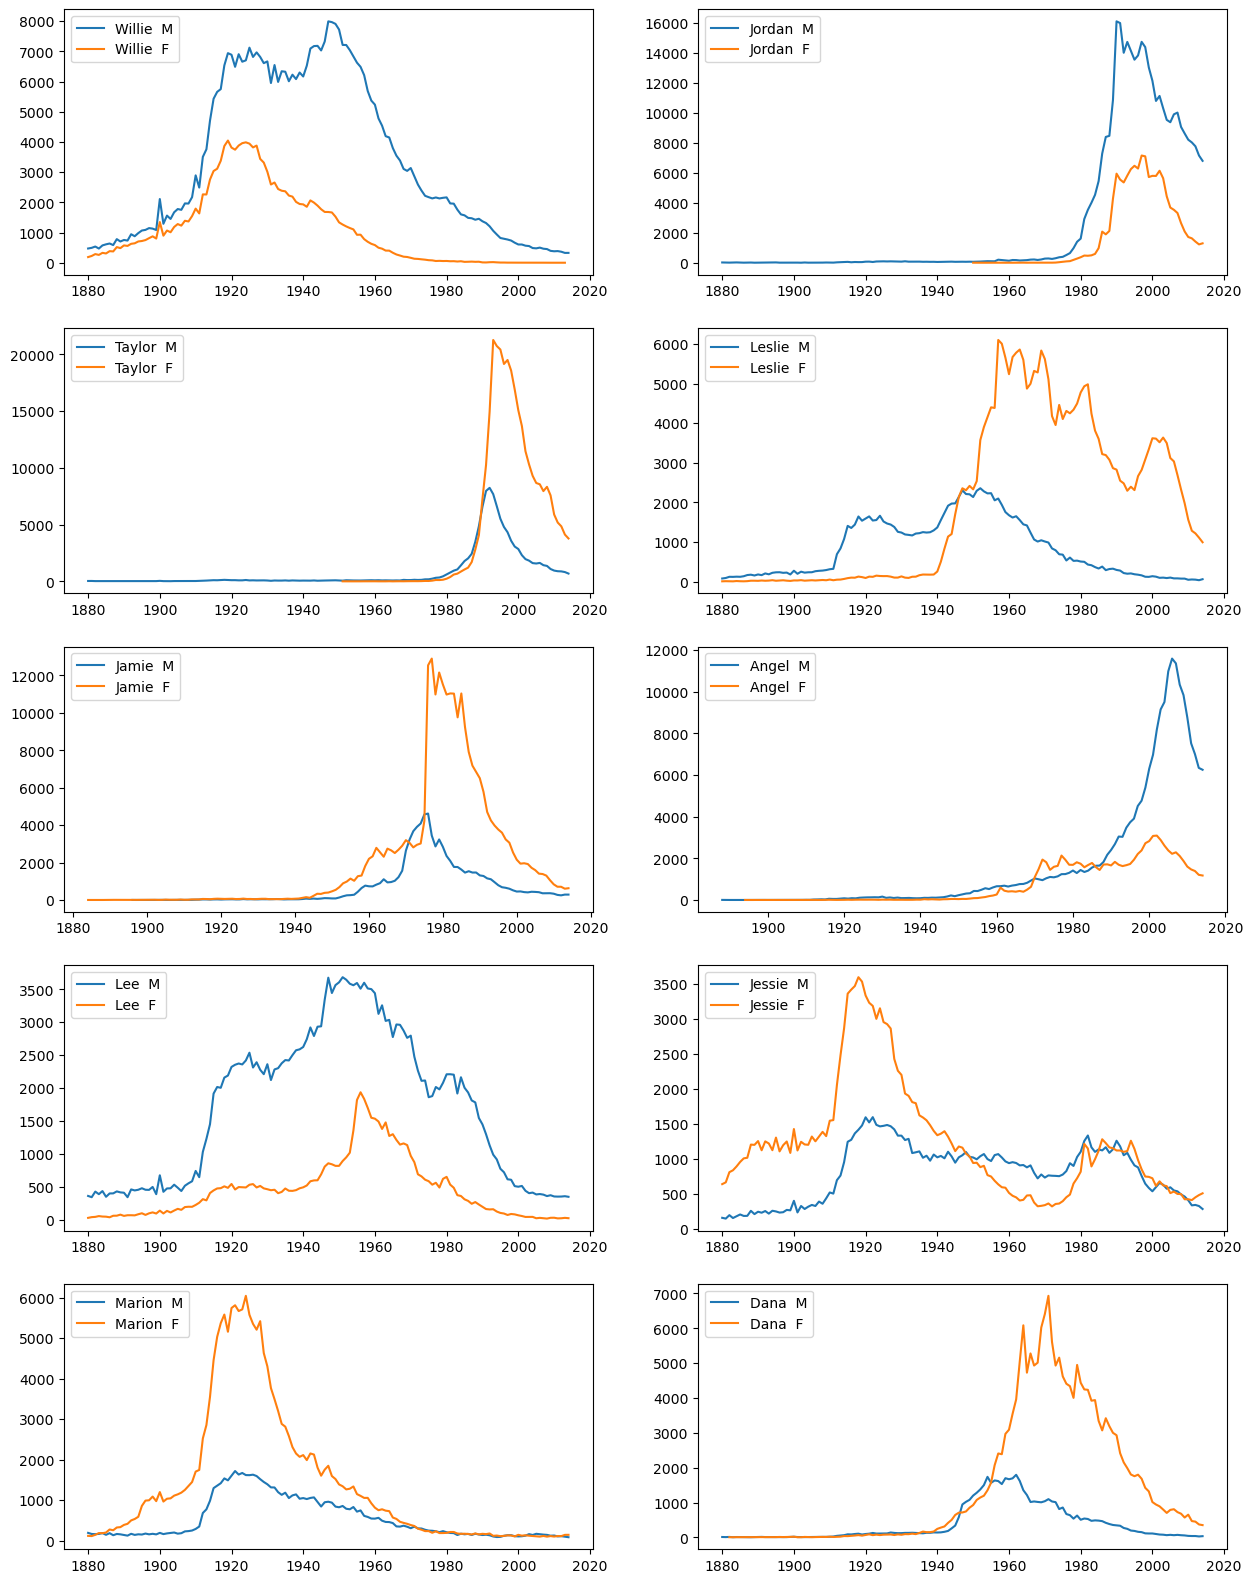

In [31]:
# Extract the top 10 unisex names from top_unisex_names
topname = top_unisex_names.head(10)
topname1 = topname.index.tolist()

fig, axs = plt.subplots(5, 2, figsize=(15, 20))  
axs = axs.flatten()  
for i, name in enumerate(topname1):
    plt.subplot(5, 2, i + 1)  
    plotname('M', name)  
    plotname('F', name)  
    plt.legend([f'{name}  M', f'{name}  F'], loc = "upper left")  

plt.show()
